# Convolutional Neural Networks (CNN)

In the first part of this lab session we will explore how __convolutions__ work, basic __CNN architectures__ and __impact of hyperparameters__. <br>
In the second part you will integrate neural network trained in part 1, to the drawing program to continuously predict drawn object.  


## Basic Imports

For this lab session, we will be needing Keras, Numpy and Tensorflow. <br>
We will build our CNN in Keras, but first we need to understand the underlying principles, for which we will use Tensorflow. <br>
Numpy will be mainly used for dataset preprocessing.

In [1]:
import keras
import numpy as np

from numpy.random import seed
import tensorflow as tf

In [2]:
try:
    %env CUDA_DEVICE_ORDER=PCI_BUS_ID
    %env CUDA_VISIBLE_DEVICES=2
except NameError:
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## ALlowing growth for remote server GPUs
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)  # set this TensorFlow session as the default session for Keras


env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=2
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:0b:00.0, compute capability: 7.5



## Replicability
While experimenting and researching, it is important that your results can be __replicated by other people__. <br>
To ensure some level of replicability, we can __set the starting seed__ of both numpy and tensorflow __to known value__. <br>
Therefore, when we initialise our network to random values, these states can be calculated and replicated just by knowing the seed.<br>
Sadly, due to the lossy nature of GPU calculations, training itself cannot be perfectly replicated, but it is still good practice to set initial seeds to known values. 

In [2]:
seed(101)
tf.random.set_seed(101)

## Low Level Code

While building model, we will add whole convolution layer in a neat package `Conv2D()`. <br>
But before we do so, it is good to understand the __underlaying mechanics__ and __code implementation__ of convolutions. <br>
In the following example, we will define our image/data array `inputs`, and using `kernel` apply 2D convolution. <br>
Full implemenation of convolution layer can be found <a src="https://github.com/keras-team/keras/blob/8ed57c168f171de7420e9a96f9e305b8236757df/keras/layers/convolutional.py#L161"> here</a>. <br>


A convolution input must have shape of `(BatchSize, width, height, inputChannels)` <br>
A convolution filter must have shape of `(width, height, inputChannels, outputChannels)` <br>

### Task
1) Experiment with different strides, kernel, padding etc. <br>
2) Why does first ouput element equal to 21.0?

# Convolutions

Convolutional Neural Networks (CNNs) are designed to learn features directly from image pixels. They can classify patterns or objects with extreme variability. Currently, they form the core of various __computer vision systems__ such as Facebooks automated photo tagging, handwritten characters recognition, self-driving cars, marine mammal detection, and medical image analysis. In this lab, we will start by exploring a convolution function which forms the heart of CNNs.

![Convolution](https://raw.githubusercontent.com/RetinalSW/COM3025/master/data/convolution_kernal.png)




In [3]:
# We need keras.backend and tensorflow to create proper tensors directly
import tensorflow.keras.backend as K
import tensorflow as tf


inputs = tf.constant([[[1.0],  [2.0],  [3.0],  [4.0],  [5.0]],
                      [[6.0],  [7.0],  [8.0],  [9.0],  [10.0]],
                      [[11.0], [12.0], [13.0], [14.0], [15.0]],
                      [[16.0], [17.0], [18.0], [19.0], [20.0]],
                      [[21.0], [22.0], [23.0], [24.0], [25.0]]
                     ])


kernel = tf.constant([[1.0,0.0,0.0],
                      [0.0,1.0,0.0],
                      [0.0,0.0,1.0]])



inputs = K.reshape(inputs,(-1,5,5,1))
print("Shape of an Input:", inputs.get_shape)

kernel =K.reshape(kernel,(3,3,1,1))
print("Shape of a Kernel", kernel.get_shape)

strides=(1, 1)
padding='valid'

result = K.conv2d(inputs, kernel, strides=strides, padding=padding)
print("Shape of result:", result.get_shape)

print("Result:", K.eval(result))

Shape of an Input: <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(1, 5, 5, 1), dtype=float32, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.],
         [20.]],

        [[21.],
         [22.],
         [23.],
         [24.],
         [25.]]]], dtype=float32)>>
Shape of a Kernel <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(3, 3, 1, 1), dtype=float32, numpy=
array([[[[1.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[1.]]]], dtype=float32)>>
Shape of result: <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[21.],
         [24.],
         [27.]],


# Dropout
Dropout consists of __randomly__ setting a fraction `rate` of input units to 0 at each update __during training time__
which helps to __prevent overfitting__. <br>
To balance the overall signal strength, we increase the non-zero outputs accordingly. 


## Arguments
`rate`: float between 0 and 1. Fraction of the input units to drop.

In [42]:
inputs = tf.constant([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
rate = 0.8

result = K.dropout(inputs, rate, None)
print("Result:", K.eval(result))

Result: [0. 5. 0. 0. 0. 0.]


# Pooling

## MaxPooling

Another important concept of CNNs is max-pooling, which is a form of
non-linear down-sampling. Max-pooling partitions the input image into a
set of non-overlapping rectangles and, for each such sub-region, outputs
the maximum value.
Max-pooling is useful in vision for two reasons:
- By eliminating non-maximal values, it reduces computation for upper layers.
- It provides a form of translation invariance.


## AveragePooling
Alternative to MaxPooling is Average pooling, where you take sum of all elements in pool and divide by number of elements. 

Experiment with different strides, kernel, padding etc. <br> 


In [47]:
inputs = tf.constant([[[1.0],  [2.0],  [3.0],  [4.0],  [5.0]],
                      [[6.0],  [7.0],  [8.0],  [9.0],  [10.0]],
                      [[11.0], [12.0], [13.0], [14.0], [15.0]],
                      [[16.0], [17.0], [18.0], [19.0], [20.0]],
                      [[21.0], [22.0], [23.0], [24.0], [25.0]]
                     ])

inputs = K.reshape(inputs,(-1,5,5,1))
print("Shape of an Input:", inputs.get_shape)

pool_size = (2,2)
strides=(1, 1)
padding='valid'
data_format=None
pool_mode='max' # or use 'avg'

result = K.pool2d(inputs, pool_size=pool_size, strides = strides,
                          padding = padding, data_format = data_format,
                          pool_mode=pool_mode)

print(result.get_shape)
# print("Result:", K.eval(result))

Shape of an Input: <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(1, 5, 5, 1), dtype=float32, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.],
         [20.]],

        [[21.],
         [22.],
         [23.],
         [24.],
         [25.]]]], dtype=float32)>>
<bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[12.],
         [13.],
         [14.],
         [15.]],

        [[17.],
         [18.],
         [19.],
         [20.]],

        [[22.],
         [23.],
         [24.],
         [25.]]]], dtype=float32)>>


# Stride and Padding
- You might have noticed the padding and stride, but do you know what the stride and padding exactly are?
## Convolution animations

_N.B.: Blue maps are inputs, and cyan maps are outputs._

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
    <td>Full padding, no strides</td>
  </tr>
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
    <td></td>
  </tr>
</table>

## Transposed convolution animations

_N.B.: Blue maps are inputs, and cyan maps are outputs._

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/arbitrary_padding_no_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/full_padding_no_strides_transposed.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides, transposed</td>
    <td>Arbitrary padding, no strides, transposed</td>
    <td>Half padding, no strides, transposed</td>
    <td>Full padding, no strides, transposed</td>
  </tr>
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_odd_transposed.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides, transposed</td>
    <td>Padding, strides, transposed</td>
    <td>Padding, strides, transposed (odd)</td>
    <td></td>
  </tr>
</table>

## Dilated convolution animations

_N.B.: Blue maps are inputs, and cyan maps are outputs._

<table style="width:25%"; table-layout:fixed;>
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/dilation.gif"></td>
  </tr>
  <tr>
    <td>No padding, no stride, dilation</td>
  </tr>
</table>

### Reference: [https://github.com/vdumoulin/conv_arithmetic](https://github.com/vdumoulin/conv_arithmetic)

## <font color='red'>Task</font>
We have a input of (1x4x4x1)
- Can you output make a Conv2D that give the output that is the same size as the input?
- Can you make the output a half smaller than the original output? `(1x2x2x1)`
- You can verify by printing out the result.shape

In [5]:
inputs = tf.constant([[[1.0],  [2.0],  [3.0],  [4.0]],
                      [[6.0],  [7.0],  [8.0],  [9.0]],
                      [[16.0], [17.0], [18.0], [19.0]],
                      [[21.0], [22.0], [23.0], [24.0]]
                     ])

inputs = K.reshape(inputs,(-1,4,4,1))
print("Shape of an Input:", inputs.shape)
# Your code here (make the same size)
strides=(1, 1)
padding='same'
result = K.conv2d(inputs, kernel, strides=strides, padding=padding)
# print(result.shape)

# Make sure your output's shape is the same as the input

# Your code here (make a half smaller)
strides=(1, 1)
padding='valid'
result = K.conv2d(inputs, kernel, strides=strides, padding=padding)
print(result.shape)

# Make sure your output's shape is the same as the input


Shape of an Input: (1, 4, 4, 1)
(1, 2, 2, 1)


# Flatten

This function will convert tensor with any shape/number of dimensions to tensor of 1 dimension. <br>
Flattening is very commonly used to convert output from convolution layer to dense layer.

In [6]:
inputs = tf.constant([[[1.0],  [2.0],  [3.0],  [4.0],  [5.0]],
                      [[6.0],  [7.0],  [8.0],  [9.0],  [10.0]],
                      [[11.0], [12.0], [13.0], [14.0], [15.0]],
                      [[16.0], [17.0], [18.0], [19.0], [20.0]],
                      [[21.0], [22.0], [23.0], [24.0], [25.0]]
                     ])

inputs = K.reshape(inputs,(-1,5,5,1))
print("Shape of an Input:", inputs.get_shape)


result = K.batch_flatten(inputs)
print(K.eval(result))


Shape of an Input: <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(1, 5, 5, 1), dtype=float32, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.],
         [20.]],

        [[21.],
         [22.],
         [23.],
         [24.],
         [25.]]]], dtype=float32)>>
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
  19. 20. 21. 22. 23. 24. 25.]]


# Dataset

We will walk through building a CNN handwritten digits classifier using the MNIST which is one of the classical datasets for neural networks. <br>

We use a pickled version of __MNIST data__ for Python. Use the load method to
load the MNIST data. 

## <font color='red'>Tasks</font>
- Please load the mnist data with Keras Loader

In [3]:
from keras.datasets import mnist
# Your code here, replace None with mnist data
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = mnist.load_data()

## Visualizing the dataset
We will use __matplot library__ to display an image from the MNIST dataset. <br>
`%matplotlib inline` will allow us to display this image directly in Jupyter Notebook cell. <br>
Since we have __grayscale__ image, we need to specify that, while displaying it via `cmap='gray'`
## <font color='red'>Task</font>
- Please try to visualize more image data, so you can grasp what is in it

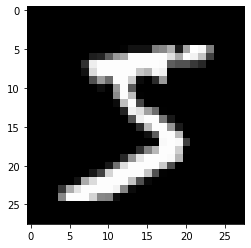

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train_orig[0], cmap='gray')

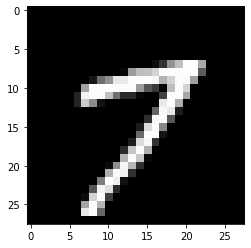

In [9]:
# Your code here, try to plot another image, maybe X_train_orig[1] or other image you like
plt.imshow(X_train_orig[1523], cmap='gray')

In [12]:
# Try to print the raw value from data, to see what is it like
print(X_train_orig[1523])
# Try to print the size a image, so you might know how it looks numerically
print(X_train_orig[1523].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  15  52
  148 192 254 253 170   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8 155 190 19

# Shaping dataset

## Images
Currently, the X part of dataset is in form `(number_of_samples, px_width, px_height)` <br>
There is one implied information about the dataset, but we need to directly specify it. This information is regarding number of channels per image. Since MNIST dataset is only greyscale, we need to specify it in the dimensionality of the dataset.
Therefore, we need to convert it from `(60000, 28, 28)` to `(60000,28,28,1)`, where `1` stands for greyscale. <br>
If we had an RGB image, the shape of the dataset would look like this `(60000,28,28,3)`

In [5]:
X_train = X_train_orig.reshape(60000,28,28,1)
X_test = X_test_orig.reshape(10000,28,28,1)

## Labels

Label for each image is in form of an __integer__ ranging from 0 to 9. <br>
We can use a __one hot encoding__ to transform them into a __binary matrix__. We know there are 10
classes for this problem, so we can expect the binary matrix to have a width
of 10.

### Converting labels to one-hot representation
y_train_orig[0] <b>before</b> conversion is <b>[5]</b> <br>
y_train_orig[0] <b>after</b> conversion is <b>[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]</b>

In [14]:
print(y_train_orig[0])

5


In [6]:
from keras.utils import to_categorical
to_categorical(y_train_orig[0], 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## <font color='red'>Task</font>
- If we want to convert `y_train_orig` to **20** class representation
  - what we need to do?
  - What happen if we convert a 10 class label into 20 class one-hot?
  - What happen if we convert a 10 class label into 2 class one-hot?

In [7]:
# Convert y_train_orig to 20 classes one-hot representation
to_categorical(y_train_orig[0], 20)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [8]:
to_categorical(y_train_orig[0], 2)

IndexError: index 5 is out of bounds for axis 1 with size 2

### Converting all labels to one-hot matrix
We will use the same `to_categorical` function to convert the whole dataset into matrix of one-hot encodings.

#### <font color='red'>Task</font>
1) What is the shape of newly created dataset? <br>
2) [Optional] Instead of pre-made `to_categorical` function, can you code your own with same functionality?

In [9]:
y_train = to_categorical(y_train_orig)
print(y_train.shape)
y_test = to_categorical(y_test_orig)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
## Custom to_categorical function
def to_categorical(y, num_classes=None, dtype='float32'):
    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
    input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
    num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

IndentationError: expected an indented block (<ipython-input-7-551af0f56730>, line 6)

# Building the model
In this section we will combine previously demonstrated mechanisms into one system. <br>

For this very simple model, we will be using `Conv2D`, `Flatten` and `Dense` layers.



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

def create_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    
    return model

In [11]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2426 - accuracy: 0.9482 - val_loss: 0.0908 - val_accuracy: 0.9716
Epoch 2/3
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0619 - accuracy: 0.9813 - val_loss: 0.1025 - val_accuracy: 0.9675
Epoch 3/3
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0848 - val_accuracy: 0.9763


## Data Normalization
Though we can observe that the neural network is learning, the rate is __very slow__ and __learning rate deteriorates very quickly__. <br>
This behaviour is due to extreme differences between `max` (255) and `min` (0) values of our dataset. <br>
Neural networks are performing __best when dataset ranges from 0 to 1__, or in some cases -1 to 1. <br>
Since we can imagine these values as signal strength, very high values, such as 255, are way too overpowering and strengthening non-optimal paths too quickly. <br>
Therefore we need to divide our training and testing dataset by 255 to get values ranging from 0 to 1. 


In [12]:
X_train = X_train/255
X_test = X_test/255

## Training on Normalized dataset
We will generate a new model and train it on normalized dataset. <br>


In [13]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1506 - accuracy: 0.9549 - val_loss: 0.0617 - val_accuracy: 0.9812
Epoch 2/4
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.0524 - val_accuracy: 0.9818
Epoch 3/4
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 4/4
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0443 - val_accuracy: 0.9859


# Saving the model

You can use `model.save(filepath)` to save a Keras model into a single HDF5 file which will contain:

- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

You can then use `keras.models.load_model(filepath)` to re-instantiate your model. `load_model` will also take care of compiling the model using the saved training configuration.

Clicking the folder icon image.png to the left shows the notebook's file browser.

In [14]:
model.save('my_model.h5') 

## Predicting custom images
You can use model you created to classify any image you want, but it is important that you pre-process the image correctly before inputting it into the model. <br>
In following code, we take a random (100th) image from testing dataset and classify it. <br>
All inputs to our network have to have same shape structure `(batch_size, width, height, channels)`. <br>
Since we want to predict only one image, our batch_size has to be 1. 

(28, 28)
(1, 28, 28, 1)


ValueError: Unknown initializer: GlorotUniform

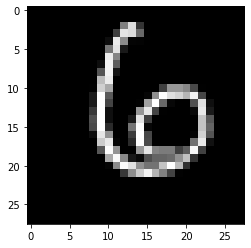

In [15]:
from keras.models import load_model

# Get image from testing dataset
test_image = X_test_orig[100]

# Display this image, so we have visual feedback
plt.imshow(test_image, cmap='gray')

# Observe the shape of this image
print(test_image.shape)

# Add 1 empty dimension before pixel data to indicate we have batch of 1
# and add 1 empty dimension after pixel data to indicate we have only 1 channel (greyscale)
test_image = test_image.reshape(1,28,28,1)
print(test_image.shape)

# Normalize data
test_image = test_image/255

model = load_model('my_model.h5')
# Classify selected image using our model
prediction = model.predict(test_image)[0]
print("Raw prediction made by model:", prediction)

# Get the element with highest confidence
most_conf_index = np.argmax(prediction)
answer_confidence = prediction[most_conf_index]

print("Model classified image as", most_conf_index, "with", answer_confidence,"confidence")



## Tensorflow Playground

To better visualise the importance of feature maps and feature extraction you can visit the following website and experiment with the structure of the network, hyperparameters to get instant visual feedback and see how your changes reflect the detection of features.

<a href="https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.77793&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false">Here


![tensorboard](https://raw.githubusercontent.com/RetinalSW/COM3025/master/data/Tensorboard.png)
</a>


In [ ]:
# https://www.cs.ryerson.ca/~aharley/vis/conv/

# Challenge
# <font color='red'> Task of this Lab </font>
- We a bunch of image data about **Afghan Hounds** and **Bedlington** (Two types of dogs)
  - Labels:
    - 0: an Afghan Hound
    - 1: a Bedlington Terrier
  - can you create a classifier that predict the which image data belongs to which kinds of dog?
  - You need to build a model to classify image into 2 types of dogs
  - after you've built the model, you need to assign a predicted value to `y_pred` based on `x_test`
  - The predicted reults should have a prediction accuracy > 0.7
  - The **greyscale** image data has been processed as 100x100x1 numpy array (for a single image)
  - Note:
    - You can flatten the image into 1-D array, so you can process it with linear classifier
    - You might need to normalize the pixel value of the image to get good performance
    - You can use loss related to binary
    - Different activation functions might have great impact to the result, please think about why

### Example of images
##### Afghan Hound
![Afghan Hound](https://raw.githubusercontent.com/hqsiswiliam/surrey_ai_lab_dataset/master/dogs/dog0_grey.png)
##### Bedlington Terrier
![Bedlington Terrier](https://raw.githubusercontent.com/hqsiswiliam/surrey_ai_lab_dataset/master/dogs/dog1_grey.png)

In [16]:
# We will help you to install necessary components
%%capture
!rm *.txt *.pyc > /dev/null
!wget http://35.197.245.114:8765/static/requirements.txt
!wget http://35.197.245.114:8765/static/challenge.pyc
!wget http://35.197.245.114:8765/static/ImagePredictionDogs.pyc
!pip install -q -r requirements.txt

UsageError: Line magic function `%%capture` not found.


In [17]:
from ImagePredictionDogs import AILabDogsClassification

[==================================================]Downloading cache_data/dogs/dogs_test.h5
[==================================================]

In [19]:
# Please enter your URN to the URN varibale here, it's important!
# Please don't change the number in week and course, or you won't be graded for this lab!

URN = 'PELASE ENTER YOUR RUN'
week = 2
course_module = 'com3025'

task = AILabDogsClassification(URN, week, course_module)

In [20]:
# We've prepared the data for you, you need to train a model based on the data we provides

x_train_dog, y_train_dog, x_test_dog = task.get_train_data()
print(x_train_dog.shape)
print(x_test_dog.shape)

(267, 100, 100)
(67, 100, 100)


In [21]:
x_train_d = x_train_dog.reshape(267,100, 100,1)
x_test_d = x_test_dog.reshape(67,100, 100,1)

y_train = to_categorical(y_train_dog)


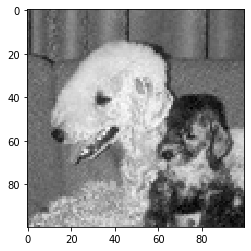

Class of this picture is: [0. 1.]


In [22]:
# You can plot the image if you like
from ImagePredictionDogs import show_grey_picture
show_grey_picture(x_train_dog[10])
print("Class of this picture is: {}".format(y_train[0]))

In [23]:
def create_model_for_dog():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(100,100,1)))
    model.add(Conv2D(32, kernel_size=3, activation="relu"))
    model.add(Flatten())
    model.add(Dense(2, activation="softmax"))
    
    return model

In [24]:
# Your code goes here
## 1) reshape input data
## 2) change the number nodes of dense layer
## 3) change input shape in the model
## 4) change loss metric

model = create_model_for_dog()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_d, y_train, epochs=3, batch_size=64)

Train on 267 samples
Epoch 1/3
267/267 [==============================] - 1s 3ms/sample - loss: 8.4109 - accuracy: 0.4494
Epoch 2/3
267/267 [==============================] - 0s 300us/sample - loss: 7.4101 - accuracy: 0.5169
Epoch 3/3
267/267 [==============================] - 0s 291us/sample - loss: 7.4101 - accuracy: 0.5169


In [26]:
# Then, you will use the trained model to get y_pred, and this will be sent to us

y_pred = model.predict(x_test_d) # make prediction here
# Please use the following code to evaluate your result,  this is a necessary step, best regards!
# Make sure the input of the evaluation is 1D array!
task.evaluate(y_pred.flatten().tolist(), model)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
